In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
data = pd.read_excel('nightlight.xls')
data.head()

,Light,Nearsightedness
0,no light,No
1,night light,No
2,lamp,No
3,no light,No
4,no light,No


In [3]:
data.Light.value_counts()

night light    232
no light       172
lamp            75
Name: Light, dtype: int64

In [4]:
data.Nearsightedness.value_counts()

No     342
Yes    137
Name: Nearsightedness, dtype: int64

### Aggregate

In [5]:
data = data.join(pd.get_dummies(data.Nearsightedness)).drop('Nearsightedness', axis=1)

In [10]:
two_way_table = data.groupby('Light').sum()
two_way_table

,No,Yes
Light,,
lamp,34,41
night light,153,79
no light,155,17


In [23]:
two_way_table = two_way_table.drop('total', axis=1)
two_way_table

,No,Yes
Light,,
lamp,34,41
night light,153,79
no light,155,17


In [24]:
two_way_table['total'] = two_way_table.sum(axis=1)
two_way_table

,No,Yes,total
Light,,,
lamp,34,41,75
night light,153,79,232
no light,155,17,172


#### Conditional percentages

In [48]:
conditional_percentages = two_way_table.apply(lambda x: x/x.total, axis=1)  # x is a row
conditional_percentages

,No,Yes,total
Light,,,
lamp,0.453333,0.546667,1.0
night light,0.659483,0.340517,1.0
no light,0.901163,0.098837,1.0


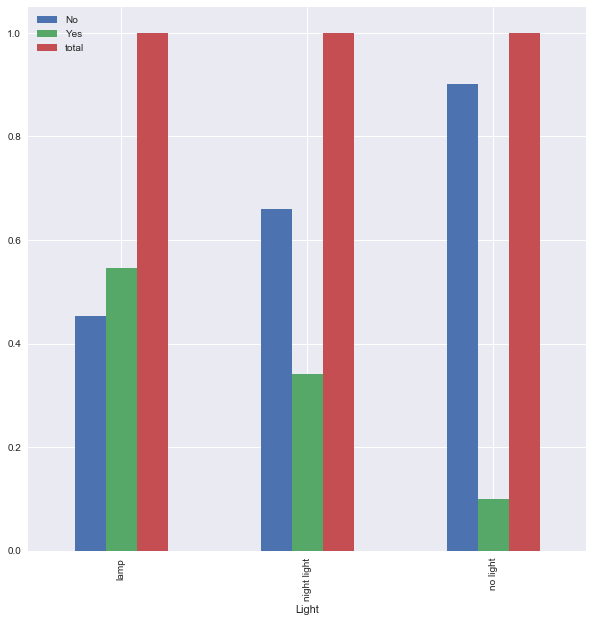

In [53]:
conditional_percentages.plot(kind='bar', figsize=(10, 10))